# Section2.回帰

## Step1 学習データの確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

# プロット
plt.plot(train_x, train_y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

## Step2 1次関数として実装

In [2]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数
def f(x):
    return theta0 + theta1 * x

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x) ** 2))

In [3]:
# 標準化
mu = train_x.mean() # mu（ミュー）は学習データの平均
sigma = train_x.std() #  sigma（シグマ）は標準偏差（データのばらつきの大きさを表わす指標）

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

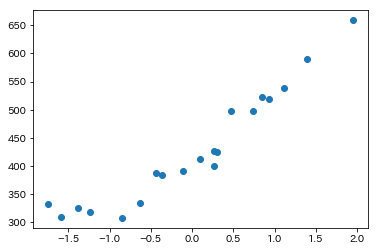

In [4]:
# プロット
plt.plot(train_z, train_y, 'o')
plt.show()

In [5]:
# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 9.074, theta1 = 1.994, 差分 = 860.5263
2回目: theta0 = 17.476, theta1 = 3.823, 差分 = 2337.0682
3回目: theta0 = 25.709, theta1 = 5.616, 差分 = 3724.9267
4回目: theta0 = 33.778, theta1 = 7.374, 差分 = 5028.2178
5回目: theta0 = 41.686, theta1 = 9.096, 差分 = 6250.8827
6回目: theta0 = 49.435, theta1 = 10.783, 差分 = 7396.6943
7回目: theta0 = 57.029, theta1 = 12.437, 差分 = 8469.2649
8回目: theta0 = 64.472, theta1 = 14.058, 差分 = 9472.0521
9回目: theta0 = 71.765, theta1 = 15.647, 差分 = 10408.3656
10回目: theta0 = 78.913, theta1 = 17.203, 差分 = 11281.3729
11回目: theta0 = 85.918, theta1 = 18.729, 差分 = 12094.1055
12回目: theta0 = 92.782, theta1 = 20.224, 差分 = 12849.4644
13回目: theta0 = 99.510, theta1 = 21.689, 差分 = 13550.2254
14回目: theta0 = 106.102, theta1 = 23.125, 差分 = 14199.0442
15回目: theta0 = 112.563, theta1 = 24.532, 差分 = 14798.4617
16回目: theta0 = 118.895, theta1 = 25.911, 差分 = 15350.9083
17回目: theta0 = 125.100, theta1 = 27.262, 差分 = 15858.7086
18回目: theta0 = 131.181, theta1 = 28.586, 差分 = 16324.0862
19回目: theta

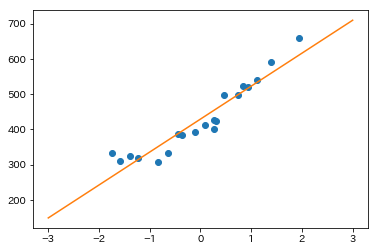

In [6]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

## Step3 検証

In [7]:
f(standardize(100))

371.0967294302196

In [8]:
f(standardize(200))

510.6477297787321

In [9]:
f(standardize(300))

650.1987301272446

## Step4 多項式回帰の実装

In [12]:
# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x **2]).T

X = to_matrix(train_z)

print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


In [24]:
# regression2_polynomial.py

import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数
def f(x):
    return np.dot(x, theta)

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 誤差の差分が0.01以下になるまで学習（パラメータ更新）を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [9.02442799 2.31394688 9.92170662], 差分 = 152622.7001
2回目: theta = [17.2285053   4.15100652 18.30782549], 差分 = 137415.1886
3回目: theta = [25.10077868  5.96295803 26.16704063], 差分 = 123807.3638
4回目: theta = [32.6584223   7.74957267 33.52890969], 差分 = 111628.8196
5回目: theta = [39.91767566  9.51066727 40.42135872], 差分 = 100727.3633
6回目: theta = [46.89389497 11.24610106 46.87077206], 差分 = 90967.0666
7回目: theta = [53.60160163 12.95577268 52.90207719], 差分 = 82226.5260
8回目: theta = [60.05452805 14.63961739 58.53882496], 差分 = 74397.3087
9回目: theta = [66.26566099 16.29760439 63.80326542], 差分 = 67382.5650
10回目: theta = [72.24728247 17.9297344  68.71641943], 差分 = 61095.7892
11回目: theta = [78.01100843 19.53603724 73.29814639], 差分 = 55459.7133
12回目: theta = [83.56782533 21.11656971 77.56720814], 差分 = 50405.3188
13回目: theta = [88.92812466 22.6714135  81.54132947], 差分 = 45870.9545
14回目: theta = [94.10173558 24.20067324 85.23725521], 差分 = 41801.5484
15回目: theta = [99.09795576 25.70447471 88

598回目: theta = [404.31744636  95.20043589  24.09608468], 差分 = 0.2931
599回目: theta = [404.33217574  95.19942819  24.08763741], 差分 = 0.2881
600回目: theta = [404.34677948  95.19842891  24.07926219], 差分 = 0.2832
601回目: theta = [404.36125864  95.19743801  24.07095841], 差分 = 0.2784
602回目: theta = [404.3756143   95.1964554   24.06272545], 差分 = 0.2737
603回目: theta = [404.38984751  95.19548103  24.05456271], 差分 = 0.2690
604回目: theta = [404.4039593   95.19451482  24.0464696 ], 差分 = 0.2644
605回目: theta = [404.41795072  95.19355671  24.03844551], 差分 = 0.2600
606回目: theta = [404.4318228   95.19260663  24.03048986], 差分 = 0.2555
607回目: theta = [404.44557655  95.19166452  24.02260207], 差分 = 0.2512
608回目: theta = [404.45921297  95.1907303   24.01478156], 差分 = 0.2469
609回目: theta = [404.47273308  95.18980392  24.00702775], 差分 = 0.2427
610回目: theta = [404.48613787  95.18888532  23.99934008], 差分 = 0.2386
611回目: theta = [404.49942831  95.18797442  23.99171797], 差分 = 0.2346
612回目: theta = [404.51260538  95.1

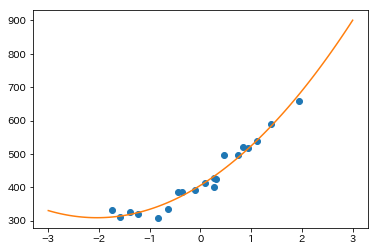

In [23]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

In [30]:
# P.170
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数
def f(x):
    return np.dot(x, theta)

# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 前回の誤差との差分を計算    
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [8.92942985 2.50259036 9.18821227], 差分 = 15352.6445
2回目: theta = [17.15007701  4.33485963 17.60845003], 差分 = 13821.9786
3回目: theta = [25.03790647  6.14216392 25.4999595 ], 差分 = 12452.3495
4回目: theta = [32.61014915  7.92426908 32.89239831], 差分 = 11226.6021
5回目: theta = [39.8830982   9.68098679 39.81378698], 差分 = 10129.4148
6回目: theta = [46.8721605  11.41217138 46.29059912], 差分 = 9147.1035
7回目: theta = [53.5919053  13.11771679 52.34784656], 差分 = 8267.4462
8回目: theta = [60.05611027 14.7975538  58.00915989], 差分 = 7479.5268
9回目: theta = [66.27780486 16.45164733 63.2968645 ], 差分 = 6773.5954
10回目: theta = [72.26931148 18.07999401 68.23205245], 差分 = 6140.9432
11回目: theta = [78.0422842  19.68261975 72.8346504 ], 差分 = 5573.7918
12回目: theta = [83.60774551 21.25957762 77.12348379], 差分 = 5065.1930
13回目: theta = [88.97612092 22.81094572 81.11633749], 差分 = 4608.9403
14回目: theta = [94.15727175 24.33682528 84.83001312], 差分 = 4199.4896
15回目: theta = [99.16052605 25.83733879 88.28038317], 差分

573回目: theta = [403.90679199  95.22846329  24.33159142], 差分 = 0.0449
574回目: theta = [403.92502432  95.22722173  24.32113545], 差分 = 0.0441
575回目: theta = [403.94310113  95.22599049  24.31076865], 差分 = 0.0434
576回目: theta = [403.96102373  95.22476949  24.30049028], 差分 = 0.0427
577回目: theta = [403.97879345  95.22355866  24.29029958], 差分 = 0.0419
578回目: theta = [403.99641159  95.22235791  24.2801958 ], 差分 = 0.0412
579回目: theta = [404.01387944  95.22116716  24.27017819], 差分 = 0.0405
580回目: theta = [404.03119829  95.21998632  24.26024603], 差分 = 0.0398
581回目: theta = [404.0483694   95.21881533  24.25039858], 差分 = 0.0392
582回目: theta = [404.06539405  95.21765409  24.24063512], 差分 = 0.0385
583回目: theta = [404.08227346  95.21650254  24.23095494], 差分 = 0.0378
584回目: theta = [404.09900889  95.21536059  24.22135733], 差分 = 0.0372
585回目: theta = [404.11560157  95.21422816  24.21184157], 差分 = 0.0366
586回目: theta = [404.13205271  95.21310518  24.20240698], 差分 = 0.0359
587回目: theta = [404.14836351  95.2

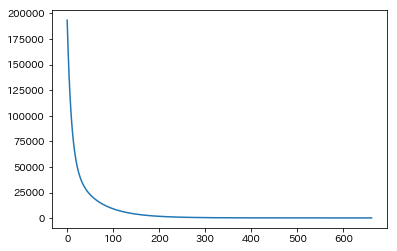

In [31]:
# P.169-170
# 繰り返し回数を横軸にして、平均二乗誤差を縦軸にして、誤差が小さくなっていくのを確認する
# プロットして確認
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

## Step5 確率的勾配降下法の実装

In [33]:
# P.172
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# パラメータを初期化
theta = np.random.rand(3)

# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 予測関数
def f(x):
    return np.dot(x, theta)

# 平均二乗誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# 学習率
ETA = 1e-3

# 平均二乗誤差の履歴
errors = []

# 誤差の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 学習データを並べ替えるためにランダムな順列を用意する
    p = np.random.permutation(X.shape[0])
    # 学習データをランダムに取り出して、確率的勾配降下法でパラメータを更新
    for x, y in zip(X[p, :], train_y[p]): # Pythonの組み込み関数zip()は複数のイテラブルオブジェクト（リストやタプルなど）の要素をまとめる関数。
        theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 前回の誤差との差分を計算
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    
    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [121.78964018  32.9763088  102.12480955], 差分 = 138786.3461
2回目: theta = [185.6021199   55.74687981 121.34086333], 差分 = 25627.7946
3回目: theta = [226.79356129  71.0465102  116.07764224], 差分 = 9872.0130
4回目: theta = [257.33341863  81.04980526 104.7282913 ], 差分 = 5810.1725
5回目: theta = [281.64638733  87.45589775  92.93712932], 差分 = 3851.5327
6回目: theta = [301.62362957  91.47285708  82.28409618], 差分 = 2639.5713
7回目: theta = [318.2581383   93.92589659  73.07681051], 差分 = 1834.4665
8回目: theta = [332.18745917  95.36769592  65.24455044], 差分 = 1285.0333
9回目: theta = [343.88085699  96.16420198  58.62139605], 差分 = 904.5839
10回目: theta = [353.70933815  96.55572031  53.03327855], 差分 = 638.7517
11回目: theta = [361.97597778  96.69883916  48.3224892 ], 差分 = 451.9286
12回目: theta = [368.93195596  96.69471023  44.35258951], 差分 = 320.1457
13回目: theta = [374.78681859  96.60796013  41.00747514], 差分 = 226.9687
14回目: theta = [379.71595236  96.47927239  38.18895203], 差分 = 160.9899
15回目: theta = [383

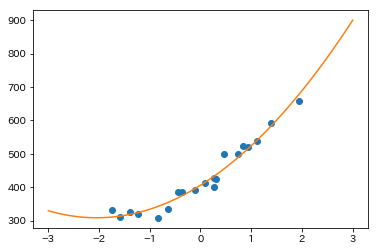

In [36]:
# プロットして確認
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()